## Example script for RichValues: using PDFs to propagate uncertainties

In this tutorial we will see how to perform calculations and propagate the uncertainties from random variables whose original probability density function (PDF) is known. With RichValues, we can save the information of the PDF of each independent variable and then see the resulting PDF once we apply the function that we want to propagate. 

We start import the libraries.

In [57]:
import math
import numpy as np
import pandas as pd
import richvalues as rv
import matplotlib.pyplot as plt

We should modify one of the default parameters of the library to assess that the PDFs are always stored in the calculations of the rich values.

In [58]:
rv.set_default_params({'save PDF in rich values': True})

Let's assume that we have a random variable $x_1$ whose probability density function (PDF) is an exponential, $\mathrm{PDF}(x) = \mathrm{exp}(-x)$, and whose domain is $[0,\infty)$.

In [59]:
x1 = rv.rval(lambda x: np.exp(-x), domain=[0,np.inf], consider_intervs=False)
x1

*0.7-0.5+1.2

The asterisk is indicating that the PDF of this rich value is not the one by default, so it is a custom one (in this case, an exponential). We can plot the PDF of this random variable to check that it is an exponential.

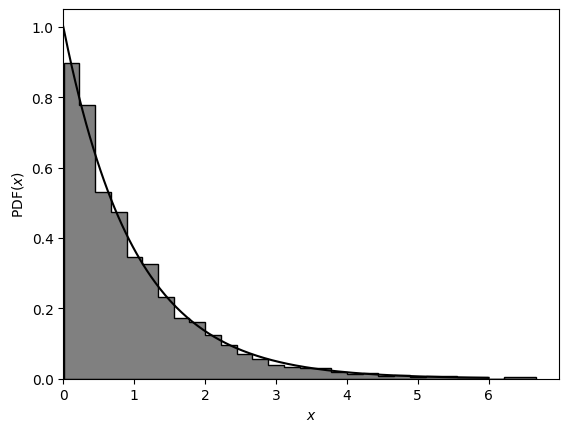

In [60]:
x_ = np.linspace(0., 6., int(1e4))
plt.figure(1)
plt.clf()
plt.plot(x_, x1.pdf(x_), color='black')
plt.hist(x1.sample(int(1e4)), bins=30, density=True, color='gray', edgecolor='black',
         histtype='stepfilled')
plt.xlim(left=0.)
plt.xlabel('$x$')
plt.ylabel('PDF($x$)')
plt.show()

Now suppose we have another random variable $x_2$ which comes from a normal distribution with mean equal to 2 and standard deviation equal to 1: $\mathrm{PDF}(x) = \mathcal{N}_{2,1}(x) = \left (1 / \sqrt{τ} \right ) \exp \left ( -\frac{1}{2}(x-2)^2 \right )$, with $τ \equiv 2π$. This time, the domain will be $(-\infty, \infty)$.

In [61]:
x2 = rv.rval(lambda x: 1/np.sqrt(math.tau)*np.exp(-(1/2)*(x-2)**2), consider_intervs=False)
x2

*2.0+/-1.0

Again, we plot the PDF of this variable.

In [62]:
We can plot the PDF of this random variable to check that it is an exponential.

SyntaxError: invalid syntax (<ipython-input-62-c3abbe0f48c6>, line 1)

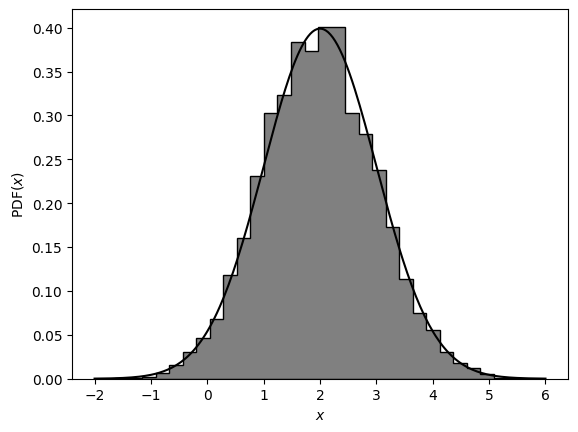

In [63]:
x_ = np.linspace(-2., 6., int(1e4))
plt.figure(2)
plt.clf()
plt.plot(x_, x2.pdf(x_), color='black')
plt.hist(x2.sample(int(1e4)), bins=30, density=True, color='gray', edgecolor='black',
         histtype='stepfilled')
plt.xlabel('$x$')
plt.ylabel('PDF($x$)')
plt.show()

Now, imagine that we want to calculate the value of $x_1 \cdot x_2$, that is, the product of the two previous variables. With RichValues, we can simply do `x1*x2`.

In [64]:
y = x1*x2
y

*1.2-1.0+2.6

This is just a representation of the result. Let's the the actual PDF, resulting of the product of the two random variables $x_1$ and $x_2$.

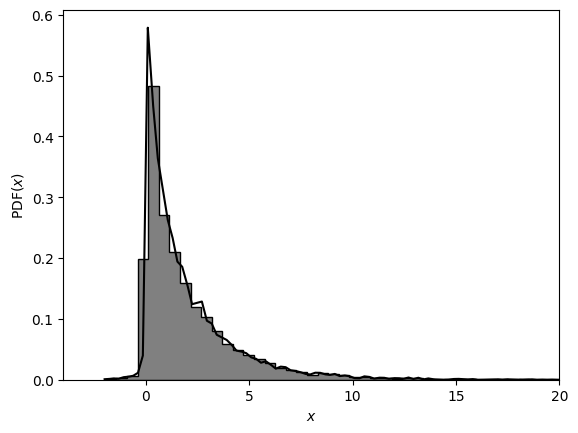

In [65]:
x_ = np.linspace(-2., 20., int(1e4))
plt.figure(3)
plt.clf()
plt.plot(x_, y.pdf(x_), color='black')
plt.hist(y.sample(int(1e4)), bins=40, density=True, color='gray', edgecolor='black',
         histtype='stepfilled')
plt.xlim(-4, 20.)
plt.xlabel('$x$')
plt.ylabel('PDF($x$)')
plt.show()

Here we have the resulting PDF. The shape is not super smooth, but that's only an effect of our numerical simulations. If you want to control more of the details, you can do as follows.

In [66]:
distr = rv.distribution('{}*{}', [x1,x2], len_samples=int(1e5), consider_intervs=False)
y = rv.evaluate_distribution(distr)
y

*1.2-1.0+2.6

Aha, we get the same result as before! Now, let's look at its PDF.

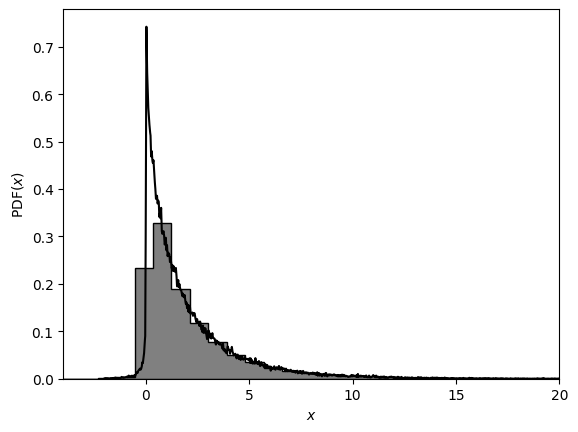

In [67]:
x_ = np.linspace(-2., 20., int(1e4))
plt.figure(4)
plt.clf()
plt.plot(x_, y.pdf(x_), color='black')
plt.hist(distr, bins=40, density=True, color='gray', edgecolor='black',
         histtype='stepfilled')
plt.xlim(-4, 20.)
plt.xlabel('$x$')
plt.ylabel('PDF($x$)')
plt.show()

We get a similar result than before, but with more spatial resolution. Another last approach is as follows.

In [68]:
y = rv.function('{}*{}', [x1,x2], len_samples=int(1e5), consider_intervs=False)
y

*1.2-0.9+2.6

Now, the plot.

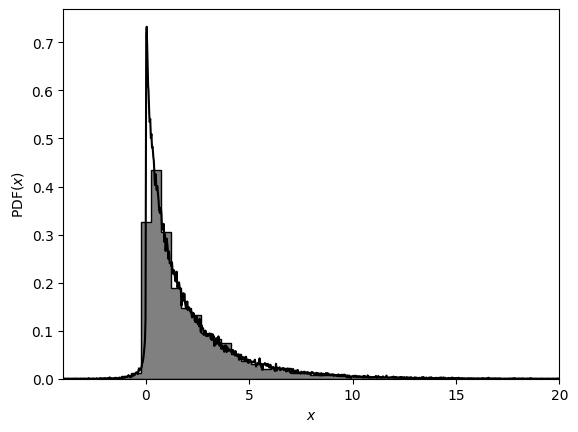

In [69]:
x_ = np.linspace(-4., 20., int(1e4))
plt.figure(5)
plt.clf()
plt.plot(x_, y.pdf(x_), color='black')
plt.hist(y.sample(int(1e4)), bins=40, density=True, color='gray', edgecolor='black',
         histtype='stepfilled')
plt.xlim(-4, 20.)
plt.xlabel('$x$')
plt.ylabel('PDF($x$)')
plt.show()

That's it. You have learnt three ways of using PDFs to propagate the uncertainties with RichValues. This would be the most accurate way.